In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

annotation_path = './data/ILT_data/ILT_data_annotations.csv'
df = pd.read_csv(annotation_path, index_col = 0)

# Caption length is computed based on a crude tokenization of the caption
df['caption_length'] = df['caption'].map(lambda x: len(re.split(r'[\s,.]', x)))
display(df)
print('Columns:', df.columns.tolist())
print('Total annotations:', df.shape)
print('Number of annotated images:', df['img'].unique().shape)

,img,folder,naam,label,caption,start,end,flag,n_seconds,caption_length
0,../fotos_klein2/fotos_klein2/eigenwerken/DJI_0...,eigenwerken,Lucy,Eigenwerken/water engineering,a construction site around a river and some ye...,2023-12-18T15:13:36.577,2023-12-18T15:15:12.020,False,95,22
1,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,schepen,Lucy,Sea faring/inland shipping,some containers containing gass or stuff on a ...,2023-12-18T15:15:12.059,2023-12-18T15:16:01.399,True,49,14
2,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,schepen,Lucy,Sea faring/inland shipping,a ship in the harbor with open latches being f...,2023-12-18T15:16:01.432,2023-12-18T15:16:59.256,False,57,17
3,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,afvalhopen,Lucy,Waste storage/waste processor,aerial view of a couple of big bags next to a ...,2023-12-18T15:16:59.282,2023-12-18T15:17:28.678,False,29,12
4,../fotos_klein2/fotos_klein2/luchtvaart/DJI_03...,luchtvaart,Lucy,Airstrip/aviation,an arial view of an airstrip with yellow lines...,2023-12-18T15:17:28.709,2023-12-18T15:17:53.004,False,24,12
...,...,...,...,...,...,...,...,...,...,...
190,../fotos_klein2/fotos_klein2/overig/DJI_0193.JPG,overig,Natalie,Miscellaneous,A grey square container next to a black square...,2023-12-27T11:58:39.398,2023-12-27T11:59:03.900,False,24,14
191,../fotos_klein2/fotos_klein2/overig/DJI_0148.JPG,overig,Natalie,Miscellaneous,Four pallets lying next to each other,2023-12-27T11:59:48.195,2023-12-27T12:00:07.244,False,19,7
192,../fotos_klein2/fotos_klein2/eigenwerken/DJI_0...,eigenwerken,Natalie,Eigenwerken/water engineering,A blue container with debris in it in the midd...,2023-12-27T12:00:07.271,2023-12-27T12:00:37.196,False,29,26
193,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,schepen,Natalie,Sea faring/inland shipping,A ship on a body of water in the dark surround...,2023-12-27T12:00:37.228,2023-12-27T12:01:28.923,False,51,16


Columns: ['img', 'folder', 'naam', 'label', 'caption', 'start', 'end', 'flag', 'n_seconds', 'caption_length']
Total annotations: (195, 10)
Number of annotated images: (98,)


In [2]:
def get_stats(lst, rounded = -1):
    stats_dict = {
        'shape': np.array(lst).shape,
        'mean': np.mean(lst), 
        'median': np.median(lst), 
        'std': np.std(lst), 
        'min': np.min(lst), 
        'max': np.max(lst)
    }
    if rounded > 0:
        for key in stats_dict:
            if key != 'shape':
                stats_dict[key] = round(stats_dict[key], rounded)
    return stats_dict

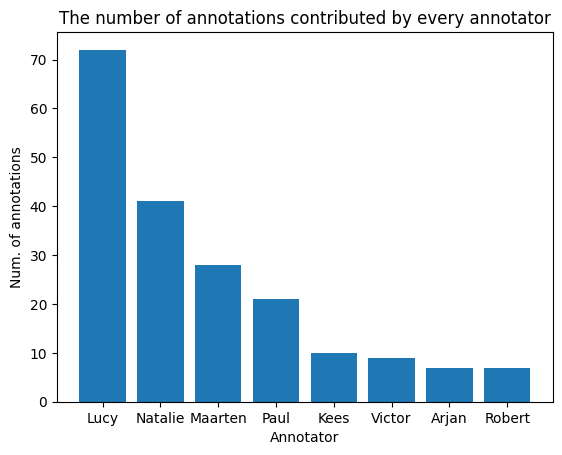

In [3]:
annotator_counts = df['naam'].value_counts()
names, freq = annotator_counts.index.tolist(), annotator_counts.values.tolist()

plt.bar(names, freq)
plt.xlabel('Annotator')
plt.ylabel('Num. of annotations')
plt.title('The number of annotations contributed by every annotator')
plt.savefig('./images/num_annotations_per_annotator.pdf', transparent = True, bbox_inches='tight')
plt.show()

In [4]:
get_stats(freq)

{'shape': (8,),
 'mean': 24.375,
 'median': 15.5,
 'std': 21.25992415320431,
 'min': 7,
 'max': 72}

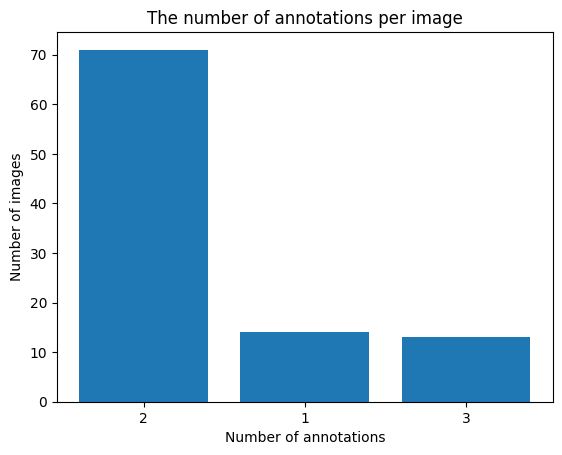

2    71
1    14
3    13
Name: caption, dtype: int64
71
14
13
{'shape': (98,), 'mean': 1.989795918367347, 'median': 2.0, 'std': 0.5247914641070935, 'min': 1, 'max': 3}


In [5]:
# Count the number of times images are labeled
img_counts = df.groupby('img').agg('count')['caption'].value_counts()
num_annotations, freq = img_counts.index.tolist(), img_counts.values.tolist()
num_annotations = [str(n) for n in num_annotations]
plt.bar(num_annotations, freq)
plt.xlabel('Number of annotations')
plt.ylabel('Number of images')
plt.title('The number of annotations per image')
plt.savefig('./images/num_annotations_per_image.pdf', transparent = True, bbox_inches='tight')
plt.show()
print(img_counts)
for img_count in img_counts:
    print(img_count)
print(get_stats(71*[2] + 14*[1] + 13 * [3]))

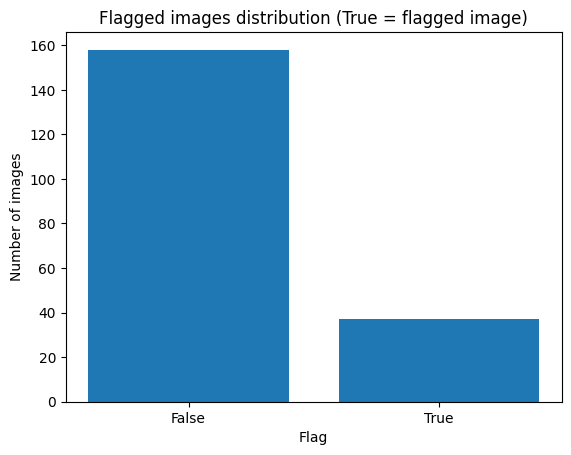

False    158
True      37
Name: flag, dtype: int64


In [6]:
# Count how many images were flagged as being hard to label
flag_counts = df['flag'].value_counts()
flag, freq = flag_counts.index.tolist(), flag_counts.values.tolist()
flag = [str(f) for f in flag]
plt.bar(flag, freq)
plt.xlabel('Flag')
plt.ylabel('Number of images')
plt.title('Flagged images distribution (True = flagged image)')
plt.savefig('./images/flag_distribution.pdf', transparent = True, bbox_inches='tight')
plt.show()
print(flag_counts)

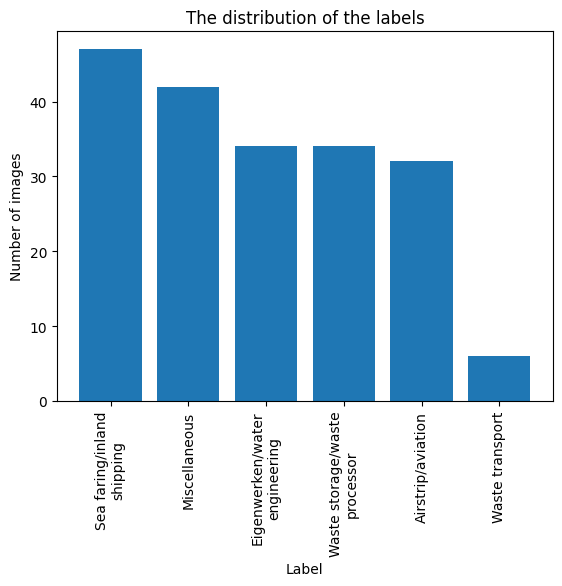

Sea faring/inland shipping       47
Miscellaneous                    42
Eigenwerken/water engineering    34
Waste storage/waste processor    34
Airstrip/aviation                32
Waste transport                   6
Name: label, dtype: int64


In [7]:
import textwrap
# Count the frequency of labels
label_counts = df['label'].value_counts()
label, freq = label_counts.index.tolist(), label_counts.values.tolist()
label = [textwrap.fill(l, 20) for l in label]
plt.bar(label, freq)
plt.xlabel('Label')
plt.xticks(rotation=90)
plt.ylabel('Number of images')
plt.title('The distribution of the labels')
plt.savefig('./images/label_distribution.pdf', transparent = True, bbox_inches='tight')
plt.show()

print(label_counts)

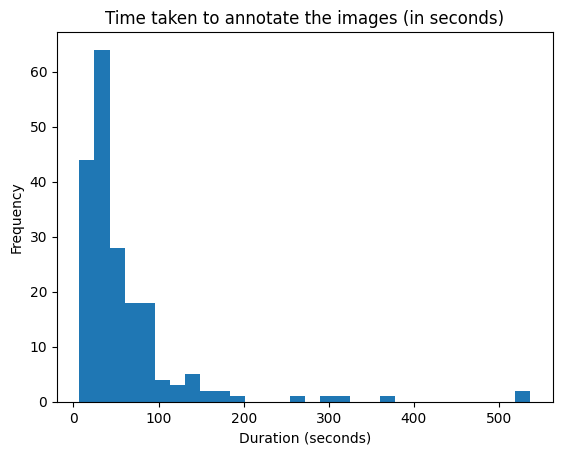

<Figure size 640x480 with 0 Axes>

{'shape': (195,), 'mean': 60.1, 'median': 38.0, 'std': 70.47, 'min': 7, 'max': 537}


In [8]:
# Plot the annotation durations
filter_outliers = False
if filter_outliers:
    annotation_duration = df[df['n_seconds']< 250]['n_seconds']
else:
    annotation_duration = df['n_seconds']

plt.hist(annotation_duration, bins = 30)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Time taken to annotate the images (in seconds)')
plt.show()
plt.savefig('./images/annotation_duration.pdf', transparent = True, bbox_inches='tight')
plt.show()
print(get_stats(annotation_duration, rounded = 2))

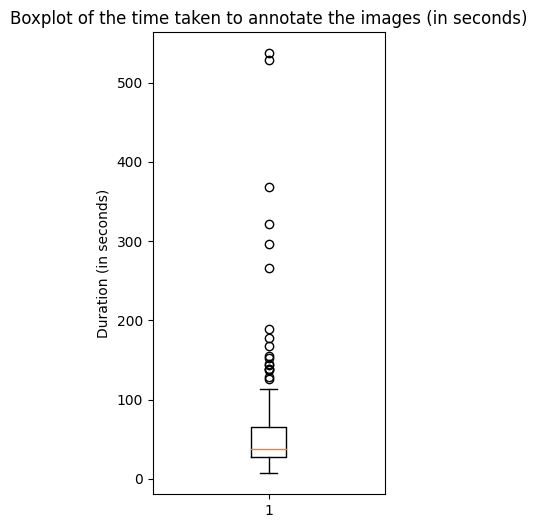

In [9]:
fig, _ = plt.subplots(figsize=(3, 6))
boxplot = plt.boxplot(annotation_duration)
plt.ylabel('Duration (in seconds)')
plt.title('Boxplot of the time taken to annotate the images (in seconds)')
plt.savefig('./images/annotation_duration_boxplot.pdf', transparent = True, bbox_inches='tight')
plt.show()

In [10]:
outliers = [flier.get_ydata() for flier in boxplot["fliers"]]
boxes = [box.get_ydata() for box in boxplot["boxes"]]
medians = [median.get_ydata() for median in boxplot["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot["whiskers"]]
outliers[0].shape, medians[0]

((18,), array([38., 38.]))

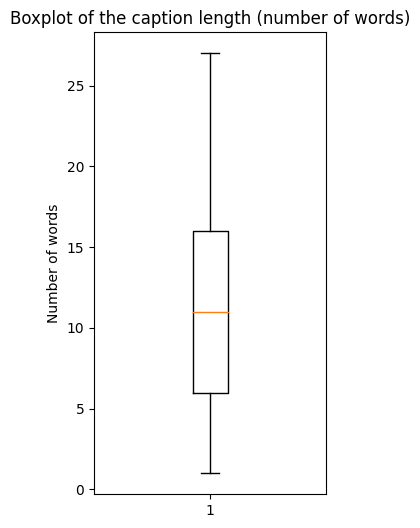

In [11]:
fig, _ = plt.subplots(figsize=(3, 6))
boxplot = plt.boxplot(df['caption_length'])
plt.ylabel('Number of words')
plt.title('Boxplot of the caption length (number of words)')
plt.savefig('./images/caption_length.pdf', transparent = True, bbox_inches='tight')
plt.show()

In [12]:
outliers = [flier.get_ydata() for flier in boxplot["fliers"]]
boxes = [box.get_ydata() for box in boxplot["boxes"]]
medians = [median.get_ydata() for median in boxplot["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot["whiskers"]]
outliers[0].shape, medians[0]

((0,), array([11., 11.]))

In [13]:
# df = df.replace('Waste transport', 'Waste storage/waste processor')

In [14]:
# Get the value counts for the labels, per image
label_counts = df.groupby('img')['label'].agg([('label_counts', lambda x: list(x.value_counts()))]).reset_index()
# Obtain which images have been labeled with more than one kind of label
label_counts['more_than_one_label'] = label_counts['label_counts'].map(lambda x: len(x) > 1)
display(label_counts)
label_counts['more_than_one_label'].value_counts()

,img,label_counts,more_than_one_label
0,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,"[2, 1]",True
1,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[2],False
2,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[2],False
3,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
4,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[1],False
...,...,...,...
93,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,[2],False
94,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,[2],False
95,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,"[1, 1]",True
96,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,[2],False


False    70
True     28
Name: more_than_one_label, dtype: int64

In [15]:
df = df.replace('Waste transport', 'Waste storage/waste processor')

In [16]:
# Get the value counts for the labels, per image
label_counts = df.groupby('img')['label'].agg([('label_counts', lambda x: list(x.value_counts()))]).reset_index()
# Obtain which images have been labeled with more than one kind of label
label_counts['more_than_one_label'] = label_counts['label_counts'].map(lambda x: len(x) > 1)
display(label_counts)
label_counts['more_than_one_label'].value_counts()

,img,label_counts,more_than_one_label
0,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
1,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[2],False
2,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[2],False
3,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
4,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[1],False
...,...,...,...
93,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,[2],False
94,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,[2],False
95,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,"[1, 1]",True
96,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,[2],False


False    72
True     26
Name: more_than_one_label, dtype: int64